# Bike Sharing Assignement

## Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. 
The company wants to know:

* Which variables are significant in predicting the demand for shared bikes.
* How well those variables describe the bike demands

The steps we will follow in this exercise are as follows:

* Reading, understanding and visualising the data
* Preparing the data for modelling (train-test split, rescaling etc.)
* Training the model
* Residual Analysis
* Predictions and evaluation on the test set

### Step 1: Reading and understaning the Data

Let us first import NumPy and Pandas and read the Bike dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read the data
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the Bike dataframe

In [3]:
bike.shape

(730, 16)

In [4]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.3+ KB


In [5]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
#Here we can see that instant is an index column and other columns like dteday, yr, mnth are same so we will drop instant and dteday column to avoid confusion
bike.drop(['instant', 'dteday'], axis= 1, inplace= True)

In [7]:
#Cross-check the data
bike.shape

(730, 14)

In [8]:
#From the above data we observe that "casual+registered" equal to cnt and cnt is our target variable so we will also drop casual and registered
bike.drop(['casual', 'registered'], axis= 1, inplace= True)
bike.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,1606
6,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,1510
7,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,959
8,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,822
9,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,1321


In [9]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: float64(4), int64(8)
memory usage: 68.5 KB


In [10]:
#from the above data we can see that: season,yr,mnth,holiday,weekday,workingday,weathersit all are categorical variables
#We will replace season,weekday,mnth and weathersit with appropriate values

In [11]:
bike['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"}, inplace= True)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
bike['weathersit'].replace({1: "Clear_Cloud", 2: "Mist_Cloud", 3: "Light_Snow", 4: "Heavy Rain_Ice Pallets"}, inplace= True)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,Mist_Cloud,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,Mist_Cloud,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,Clear_Cloud,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,Clear_Cloud,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,Clear_Cloud,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
bike['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"}, inplace= True)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,Saturday,0,Mist_Cloud,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Sunday,0,Mist_Cloud,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Monday,1,Clear_Cloud,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Tuesday,1,Clear_Cloud,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Wednesday,1,Clear_Cloud,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
bike['mnth'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}, inplace= True)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,Mist_Cloud,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,Mist_Cloud,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,Clear_Cloud,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,Clear_Cloud,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,Clear_Cloud,9.305237,11.46350,43.6957,12.522300,1600


In [15]:
#Cross-Check the data type
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,Mist_Cloud,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,Mist_Cloud,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,Clear_Cloud,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,Clear_Cloud,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,Clear_Cloud,9.305237,11.46350,43.6957,12.522300,1600


In [16]:
bike.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [17]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
season        730 non-null object
yr            730 non-null int64
mnth          730 non-null object
holiday       730 non-null int64
weekday       730 non-null object
workingday    730 non-null int64
weathersit    730 non-null object
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: float64(4), int64(4), object(4)
memory usage: 68.5+ KB


### Visualising the Data

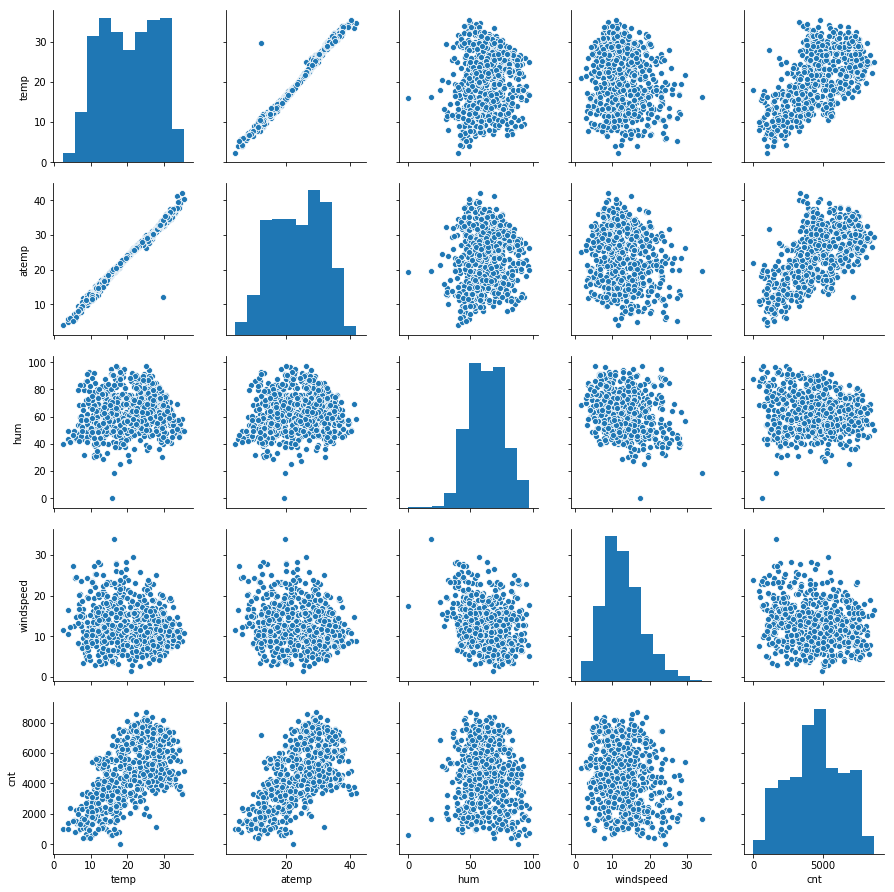

In [18]:
#Pairplots to understand the numerical variables
sns.pairplot(bike,  vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

#### Visualising Categorical Variables to understand better the data

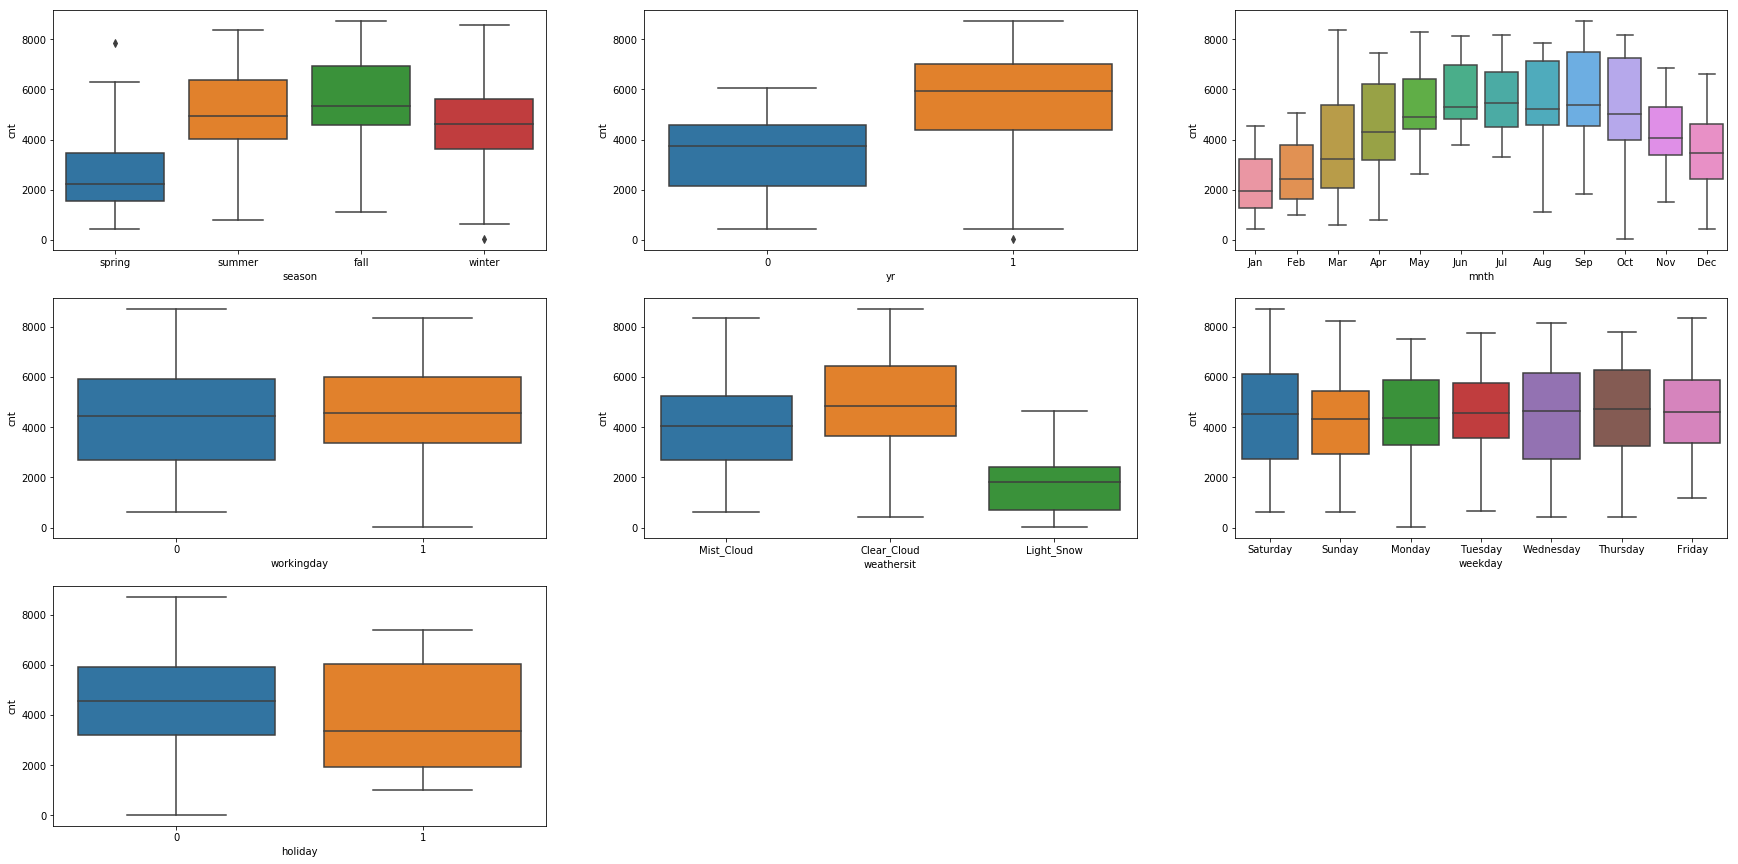

In [19]:
plt.figure(figsize=(30, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(3,3,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.show()

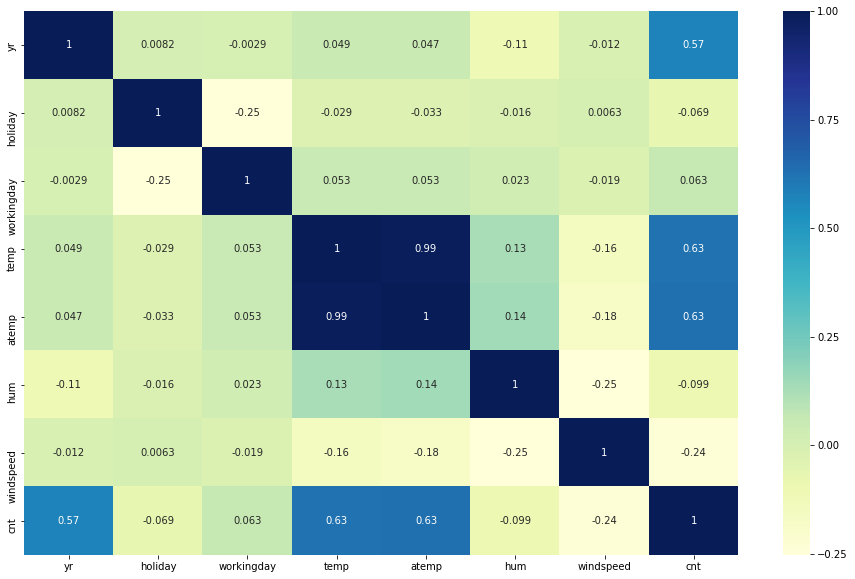

In [20]:
# from above graphs we can say that temp and atemp have a relationship
#let check the correlation
plt.figure(figsize = (16, 10))
sns.heatmap(bike.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [21]:
#From the above graph we can see the coorelation between temp & atemp is 0.99 which is almost equal to 1  
#ets drop temp and consider atemp only.
bike.drop(['temp'],axis=1,inplace=True)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,Mist_Cloud,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,Mist_Cloud,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,Clear_Cloud,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,Clear_Cloud,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,Clear_Cloud,11.46350,43.6957,12.522300,1600


In [22]:
#Convert few variables to object type
bike['mnth']=bike['mnth'].astype(object)
bike['season']=bike['season'].astype(object)
bike['weathersit']=bike['weathersit'].astype(object)
bike['weekday']=bike['weekday'].astype(object)
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
season        730 non-null object
yr            730 non-null int64
mnth          730 non-null object
holiday       730 non-null int64
weekday       730 non-null object
workingday    730 non-null int64
weathersit    730 non-null object
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: float64(3), int64(4), object(4)
memory usage: 62.8+ KB


In [23]:
#Create a dummy variable for Categorical Variables 
Season_cond=pd.get_dummies(bike['season'],drop_first=True)
Weather_cond=pd.get_dummies(bike['weathersit'],drop_first=True)
week_day=pd.get_dummies(bike['weekday'],drop_first=True)
month=pd.get_dummies(bike['mnth'],drop_first=True)

In [24]:
bike=pd.concat([bike, Season_cond],axis=1)
bike=pd.concat([bike, Weather_cond],axis=1)
bike=pd.concat([bike, week_day],axis=1)
bike=pd.concat([bike, month],axis=1)
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
season        730 non-null object
yr            730 non-null int64
mnth          730 non-null object
holiday       730 non-null int64
weekday       730 non-null object
workingday    730 non-null int64
weathersit    730 non-null object
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
spring        730 non-null uint8
summer        730 non-null uint8
winter        730 non-null uint8
Light_Snow    730 non-null uint8
Mist_Cloud    730 non-null uint8
Monday        730 non-null uint8
Saturday      730 non-null uint8
Sunday        730 non-null uint8
Thursday      730 non-null uint8
Tuesday       730 non-null uint8
Wednesday     730 non-null uint8
Aug           730 non-null uint8
Dec           730 non-null uint8
Feb           730 non-null uint8
Jan           730 non-null uint8
Jul           730 non-null 

In [25]:
#Drop the redundant columns season, weathersit, weekday, mnth
bike.drop(['season'],axis=1,inplace=True)

bike.drop(['weathersit'],axis=1,inplace=True)

bike.drop(['weekday'],axis=1,inplace=True)

bike.drop(['mnth'],axis=1,inplace=True)


bike.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,1,0,0,0,0,0,0,0


### Step 2: Preparing the Data for Modelling

* Splitting into train and test
* Rescaling of variables

#### Splitting into train and test

In [26]:
#Data are ready to split
from sklearn.model_selection import train_test_split

# We have to specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bike_train, bike_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)
bike_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
653,1,0,1,23.0423,55.8333,12.208807,7534,0,0,1,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,33.1448,70.4167,11.083475,7216,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,20.6746,62.1250,10.792293,4066,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,11.5850,48.3333,23.500518,1796,1,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,18.8752,48.9583,8.708325,4220,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
bike_train.shape

(510, 29)

In [28]:
bike_test.shape

(219, 29)

In [29]:
bike_train.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
       'spring', 'summer', 'winter', 'Light_Snow', 'Mist_Cloud', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Aug', 'Dec',
       'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'],
      dtype='object')

#### Rescaling the Features

1-Min-Max scaling (normalisation): Between 0 and 1

2-Standardisation(mean-0, sigma-1)

In [30]:
#Scaling the numerical data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [31]:
num_vars = ['atemp','hum','windspeed','cnt']
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars]) 
bike_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
bike_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392
std,0.500429,0.157763,0.468282,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
# Create X and y for train data set
y_train=bike_train.pop('cnt') # removes the target variable from the y_train dataset and retain the rest variables
X_train=bike_train
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,Light_Snow,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
653,1,0,1,0.501133,0.575354,0.300794,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [35]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [36]:
#Using RFE approach for feature selection
#We start with 15 vars & will use mixed approach to build a model 
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train, y_train)

In [37]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 6),
 ('winter', True, 1),
 ('Light_Snow', True, 1),
 ('Mist_Cloud', True, 1),
 ('Monday', False, 9),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 11),
 ('Tuesday', False, 10),
 ('Wednesday', False, 12),
 ('Aug', False, 7),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 8),
 ('Mar', False, 14),
 ('May', False, 5),
 ('Nov', False, 2),
 ('Oct', False, 13),
 ('Sep', True, 1)]

In [38]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'spring',
       'winter', 'Light_Snow', 'Mist_Cloud', 'Saturday', 'Sunday', 'Jan',
       'Jul', 'Sep'],
      dtype='object')

In [39]:
X_train.columns[~rfe.support_]

Index(['summer', 'Monday', 'Thursday', 'Tuesday', 'Wednesday', 'Aug', 'Dec',
       'Feb', 'Jun', 'Mar', 'May', 'Nov', 'Oct'],
      dtype='object')

In [40]:
X_train_rfe = X_train[col]

## Step 3: Training the Model

In [41]:
#Building a Model using Statsmodel:
import statsmodels.api as sm
X_train_rfe1 = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe1).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.66e-188
Time:                        16:11:03   Log-Likelihood:                 510.32
No. Observations:                 510   AIC:                            -990.6
Df Residuals:                     495   BIC:                            -927.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2535      0.026      9.914      0.0

In [42]:
#VIF computation to check multicollinearity between independent variables
#check VIF for 1st model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF']= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by= "VIF", ascending= False)
vif

,Features,VIF
2,workingday,41.67
10,Saturday,10.16
11,Sunday,9.84
3,atemp,3.11
6,spring,2.66
1,holiday,2.57
4,hum,1.91
7,winter,1.75
9,Mist_Cloud,1.57
12,Jan,1.56


In [43]:
X_train_rfe1.head()

,const,yr,holiday,workingday,atemp,hum,windspeed,spring,winter,Light_Snow,Mist_Cloud,Saturday,Sunday,Jan,Jul,Sep
653,1.0,1,0,1,0.501133,0.575354,0.300794,0,1,0,0,0,0,0,0,0
576,1.0,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,1,0
426,1.0,1,0,0,0.438975,0.640189,0.255342,1,0,0,1,1,0,0,0,0
728,1.0,1,0,0,0.200348,0.498067,0.663106,1,0,0,0,0,1,0,0,0
482,1.0,1,0,0,0.391735,0.504508,0.188475,0,0,0,1,1,0,0,0,0


In [44]:
#Column 'holiday' has very high p-value and VIF so we will drop it
X_train_rfe=X_train_rfe.drop(['holiday'],axis=1)

In [45]:
import statsmodels.api as sm
X_train_rfe1 = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe1).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.66e-188
Time:                        16:11:05   Log-Likelihood:                 510.32
No. Observations:                 510   AIC:                            -990.6
Df Residuals:                     495   BIC:                            -927.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2510      0.040      6.252      0.0

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,29.98
2,atemp,18.21
1,workingday,17.13
9,Saturday,4.62
4,windspeed,4.51
10,Sunday,4.49
5,spring,3.05
8,Mist_Cloud,2.28
6,winter,2.11
0,yr,2.08


In [47]:
#Column 'workingday' has  high VIF so we will drop it
X_train_rfe=X_train_rfe.drop(['workingday'],axis=1)

In [48]:
X_train_rfe2 = sm.add_constant(X_train_rfe)
lm2 = sm.OLS(y_train,X_train_rfe2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.5
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.65e-186
Time:                        16:11:05   Log-Likelihood:                 502.80
No. Observations:                 510   AIC:                            -977.6
Df Residuals:                     496   BIC:                            -918.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3474      0.032     10.921      0.0

In [49]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,24.00
1,atemp,15.97
3,windspeed,3.99
4,spring,2.85
7,Mist_Cloud,2.25
0,yr,2.06
5,winter,2.05
10,Jan,1.67
11,Jul,1.40
6,Light_Snow,1.23


In [50]:
#Column 'atemp' VIF>3 so we will drop it
X_train_rfe=X_train_rfe.drop(['atemp'],axis=1)

In [51]:
X_train_rfe3 = sm.add_constant(X_train_rfe)
lm3 = sm.OLS(y_train,X_train_rfe3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     140.6
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          4.13e-151
Time:                        16:11:05   Log-Likelihood:                 415.97
No. Observations:                 510   AIC:                            -805.9
Df Residuals:                     497   BIC:                            -750.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5731      0.033     17.569      0.0

In [52]:
#Saturday has a very high p-value which means it is insignificant so we drop it
X_train_rfe=X_train_rfe.drop(['Saturday'],axis=1)

In [53]:
X_train_rfe4 = sm.add_constant(X_train_rfe)
lm4 = sm.OLS(y_train,X_train_rfe4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     153.3
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          4.87e-152
Time:                        16:11:06   Log-Likelihood:                 415.55
No. Observations:                 510   AIC:                            -807.1
Df Residuals:                     498   BIC:                            -756.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5759      0.032     17.743      0.0

In [54]:
#Jul has also a very high p-value which means it is insignificant so we drop it
X_train_rfe=X_train_rfe.drop(['Jul'],axis=1)

In [55]:
X_train_rfe5 = sm.add_constant(X_train_rfe)
lm5 = sm.OLS(y_train,X_train_rfe5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     168.6
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          5.82e-153
Time:                        16:11:06   Log-Likelihood:                 415.07
No. Observations:                 510   AIC:                            -808.1
Df Residuals:                     499   BIC:                            -761.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5808      0.032     18.109      0.0

In [56]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,6.43
2,windspeed,3.78
3,spring,2.14
0,yr,1.95
6,Mist_Cloud,1.88
8,Jan,1.60
4,winter,1.53
7,Sunday,1.18
9,Sep,1.15
5,Light_Snow,1.12


In [57]:
#Adding Saturday Column and Checking if the model improves
X_train_rfe['Saturday']= X_train['Saturday']
X_train_rfe.head()

,yr,hum,windspeed,spring,winter,Light_Snow,Mist_Cloud,Sunday,Jan,Sep,Saturday
653,1,0.575354,0.300794,0,1,0,0,0,0,0,0
576,1,0.725633,0.264686,0,0,0,0,0,0,0,0
426,1,0.640189,0.255342,1,0,0,1,0,0,0,1
728,1,0.498067,0.663106,1,0,0,0,1,0,0,0
482,1,0.504508,0.188475,0,0,0,1,0,0,0,1


In [58]:
X_train_rfe6 = sm.add_constant(X_train_rfe)
lm6 = sm.OLS(y_train,X_train_rfe6).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     153.3
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          5.10e-152
Time:                        16:11:07   Log-Likelihood:                 415.51
No. Observations:                 510   AIC:                            -807.0
Df Residuals:                     498   BIC:                            -756.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5778      0.032     17.922      0.0

In [59]:
#Saturday has high p-value so we drop it

X_train_rfe= X_train_rfe.drop(['Saturday'],axis=1)


In [60]:

X_train_rfe7 = sm.add_constant(X_train_rfe)
lm7 = sm.OLS(y_train,X_train_rfe7).fit()
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     168.6
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          5.82e-153
Time:                        16:11:07   Log-Likelihood:                 415.07
No. Observations:                 510   AIC:                            -808.1
Df Residuals:                     499   BIC:                            -761.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5808      0.032     18.109      0.0

In [61]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,6.43
2,windspeed,3.78
3,spring,2.14
0,yr,1.95
6,Mist_Cloud,1.88
8,Jan,1.60
4,winter,1.53
7,Sunday,1.18
9,Sep,1.15
5,Light_Snow,1.12


In [62]:
#hum has high p-value so we drop it
X_train_rfe= X_train_rfe.drop(['hum'],axis=1)

In [63]:
X_train_rfe8 = sm.add_constant(X_train_rfe)
lm8 = sm.OLS(y_train,X_train_rfe8).fit()
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     187.7
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          4.31e-154
Time:                        16:11:08   Log-Likelihood:                 415.03
No. Observations:                 510   AIC:                            -810.1
Df Residuals:                     500   BIC:                            -767.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5723      0.013     43.029      0.0

In [64]:
#Adding Sunday Column and Checking if the model improves
X_train_rfe['Sunday']=X_train['Sunday']
X_train_rfe.head()

,yr,windspeed,spring,winter,Light_Snow,Mist_Cloud,Sunday,Jan,Sep
653,1,0.300794,0,1,0,0,0,0,0
576,1,0.264686,0,0,0,0,0,0,0
426,1,0.255342,1,0,0,1,0,0,0
728,1,0.663106,1,0,0,0,1,0,0
482,1,0.188475,0,0,0,1,0,0,0


In [65]:
X_train_rfe9 = sm.add_constant(X_train_rfe)
lm9 = sm.OLS(y_train,X_train_rfe9).fit()
print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     187.7
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          4.31e-154
Time:                        16:11:08   Log-Likelihood:                 415.03
No. Observations:                 510   AIC:                            -810.1
Df Residuals:                     500   BIC:                            -767.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5723      0.013     43.029      0.0

In [66]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,windspeed,2.58
2,spring,2.12
0,yr,1.74
7,Jan,1.59
5,Mist_Cloud,1.45
3,winter,1.37
6,Sunday,1.15
8,Sep,1.09
4,Light_Snow,1.08


In [67]:
#Adding workingday Column and Checking if the model improves
X_train_rfe['workingday']=X_train['workingday']
X_train_rfe.head()

,yr,windspeed,spring,winter,Light_Snow,Mist_Cloud,Sunday,Jan,Sep,workingday
653,1,0.300794,0,1,0,0,0,0,0,1
576,1,0.264686,0,0,0,0,0,0,0,1
426,1,0.255342,1,0,0,1,0,0,0,0
728,1,0.663106,1,0,0,0,1,0,0,0
482,1,0.188475,0,0,0,1,0,0,0,0


In [68]:
X_train_rfe10 = sm.add_constant(X_train_rfe)
lm10 = sm.OLS(y_train,X_train_rfe10).fit()
print(lm10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     168.7
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          5.18e-153
Time:                        16:11:09   Log-Likelihood:                 415.19
No. Observations:                 510   AIC:                            -808.4
Df Residuals:                     499   BIC:                            -761.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5662      0.017     33.130      0.0

In [69]:
#workingday has very high p-value so we drop it

X_train_rfe=X_train_rfe.drop(['workingday'],axis=1)


In [70]:
X_train_rfe11 = sm.add_constant(X_train_rfe)
lm11 = sm.OLS(y_train,X_train_rfe11).fit()
print(lm11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     187.7
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          4.31e-154
Time:                        16:11:09   Log-Likelihood:                 415.03
No. Observations:                 510   AIC:                            -810.1
Df Residuals:                     500   BIC:                            -767.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5723      0.013     43.029      0.0

In [71]:

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,windspeed,2.58
2,spring,2.12
0,yr,1.74
7,Jan,1.59
5,Mist_Cloud,1.45
3,winter,1.37
6,Sunday,1.15
8,Sep,1.09
4,Light_Snow,1.08


In [72]:
#Adding Feb month to check if the model improves
X_train_rfe['Feb']=X_train['Feb']
X_train_rfe.head()

,yr,windspeed,spring,winter,Light_Snow,Mist_Cloud,Sunday,Jan,Sep,Feb
653,1,0.300794,0,1,0,0,0,0,0,0
576,1,0.264686,0,0,0,0,0,0,0,0
426,1,0.255342,1,0,0,1,0,0,0,0
728,1,0.663106,1,0,0,0,1,0,0,0
482,1,0.188475,0,0,0,1,0,0,0,0


In [73]:
X_train_rfe12 = sm.add_constant(X_train_rfe)
lm12 = sm.OLS(y_train,X_train_rfe12).fit()
print(lm12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     171.7
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.75e-154
Time:                        16:11:09   Log-Likelihood:                 418.67
No. Observations:                 510   AIC:                            -815.3
Df Residuals:                     499   BIC:                            -768.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5719      0.013     43.262      0.0

In [74]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,spring,3.30
1,windspeed,2.58
7,Jan,2.02
9,Feb,1.76
0,yr,1.74
5,Mist_Cloud,1.45
3,winter,1.37
6,Sunday,1.15
8,Sep,1.09
4,Light_Snow,1.08


In [75]:
#Adding July month to check if the model improves
X_train_rfe['Jul']=X_train['Jul']
X_train_rfe.head()

,yr,windspeed,spring,winter,Light_Snow,Mist_Cloud,Sunday,Jan,Sep,Feb,Jul
653,1,0.300794,0,1,0,0,0,0,0,0,0
576,1,0.264686,0,0,0,0,0,0,0,0,1
426,1,0.255342,1,0,0,1,0,0,0,0,0
728,1,0.663106,1,0,0,0,1,0,0,0,0
482,1,0.188475,0,0,0,1,0,0,0,0,0


In [76]:
X_train_rfe12 = sm.add_constant(X_train_rfe)
lm12 = sm.OLS(y_train,X_train_rfe12).fit()
print(lm12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     156.2
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.46e-153
Time:                        16:11:09   Log-Likelihood:                 419.17
No. Observations:                 510   AIC:                            -814.3
Df Residuals:                     498   BIC:                            -763.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5677      0.014     40.901      0.0

In [77]:
#Month July  has very high p-value so we drop it

X_train_rfe=X_train_rfe.drop(['Jul'],axis=1)

In [78]:
X_train_rfe13 = sm.add_constant(X_train_rfe)
lm13 = sm.OLS(y_train,X_train_rfe13).fit()
print(lm13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     171.7
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.75e-154
Time:                        16:11:10   Log-Likelihood:                 418.67
No. Observations:                 510   AIC:                            -815.3
Df Residuals:                     499   BIC:                            -768.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5719      0.013     43.262      0.0

In [79]:

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,spring,3.30
1,windspeed,2.58
7,Jan,2.02
9,Feb,1.76
0,yr,1.74
5,Mist_Cloud,1.45
3,winter,1.37
6,Sunday,1.15
8,Sep,1.09
4,Light_Snow,1.08


In [80]:
#Adding October month to check if the model improves
X_train_rfe['Oct']=X_train['Oct']
X_train_rfe.head()

,yr,windspeed,spring,winter,Light_Snow,Mist_Cloud,Sunday,Jan,Sep,Feb,Oct
653,1,0.300794,0,1,0,0,0,0,0,0,1
576,1,0.264686,0,0,0,0,0,0,0,0,0
426,1,0.255342,1,0,0,1,0,0,0,0,0
728,1,0.663106,1,0,0,0,1,0,0,0,0
482,1,0.188475,0,0,0,1,0,0,0,0,0


In [81]:
X_train_rfe14 = sm.add_constant(X_train_rfe)
lm14 = sm.OLS(y_train,X_train_rfe14).fit()
print(lm14.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     166.2
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          8.17e-159
Time:                        16:11:10   Log-Likelihood:                 431.61
No. Observations:                 510   AIC:                            -839.2
Df Residuals:                     498   BIC:                            -788.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5725      0.013     44.377      0.0

In [82]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,spring,3.30
1,windspeed,2.58
7,Jan,2.02
3,winter,1.87
9,Feb,1.76
0,yr,1.74
10,Oct,1.57
5,Mist_Cloud,1.45
6,Sunday,1.15
4,Light_Snow,1.10


In [83]:
#This model has improved so we can keep it

In [84]:
#Adding November month to check if the model improves
X_train_rfe['Nov']=X_train['Nov']
X_train_rfe.head()

,yr,windspeed,spring,winter,Light_Snow,Mist_Cloud,Sunday,Jan,Sep,Feb,Oct,Nov
653,1,0.300794,0,1,0,0,0,0,0,0,1,0
576,1,0.264686,0,0,0,0,0,0,0,0,0,0
426,1,0.255342,1,0,0,1,0,0,0,0,0,0
728,1,0.663106,1,0,0,0,1,0,0,0,0,0
482,1,0.188475,0,0,0,1,0,0,0,0,0,0


In [85]:
X_train_rfe15 = sm.add_constant(X_train_rfe)
lm15 = sm.OLS(y_train,X_train_rfe15).fit()
print(lm15.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     152.2
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          8.90e-158
Time:                        16:11:10   Log-Likelihood:                 431.81
No. Observations:                 510   AIC:                            -837.6
Df Residuals:                     497   BIC:                            -782.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5724      0.013     44.326      0.0

In [86]:
#Month Nov has very high p-value so we will remove it
X_train_rfe=X_train_rfe.drop(['Nov'],axis=1)

In [87]:
X_train_rfe16 = sm.add_constant(X_train_rfe)
lm16 = sm.OLS(y_train,X_train_rfe16).fit()
print(lm16.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     166.2
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          8.17e-159
Time:                        16:11:11   Log-Likelihood:                 431.61
No. Observations:                 510   AIC:                            -839.2
Df Residuals:                     498   BIC:                            -788.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5725      0.013     44.377      0.0

In [88]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,spring,3.30
1,windspeed,2.58
7,Jan,2.02
3,winter,1.87
9,Feb,1.76
0,yr,1.74
10,Oct,1.57
5,Mist_Cloud,1.45
6,Sunday,1.15
4,Light_Snow,1.10


In [89]:
#Adding December month to check if the model improves
X_train_rfe['Dec']=X_train['Dec']
X_train_rfe.head()

,yr,windspeed,spring,winter,Light_Snow,Mist_Cloud,Sunday,Jan,Sep,Feb,Oct,Dec
653,1,0.300794,0,1,0,0,0,0,0,0,1,0
576,1,0.264686,0,0,0,0,0,0,0,0,0,0
426,1,0.255342,1,0,0,1,0,0,0,0,0,0
728,1,0.663106,1,0,0,0,1,0,0,0,0,1
482,1,0.188475,0,0,0,1,0,0,0,0,0,0


In [90]:
X_train_rfe17 = sm.add_constant(X_train_rfe)
lm17 = sm.OLS(y_train,X_train_rfe17).fit()
print(lm17.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     156.7
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          3.08e-160
Time:                        16:11:11   Log-Likelihood:                 437.66
No. Observations:                 510   AIC:                            -849.3
Df Residuals:                     497   BIC:                            -794.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5761      0.013     44.993      0.0

In [91]:

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,spring,3.69
1,windspeed,2.58
3,winter,2.49
7,Jan,2.17
9,Feb,1.86
10,Oct,1.78
0,yr,1.74
11,Dec,1.53
5,Mist_Cloud,1.46
6,Sunday,1.15


In [92]:
#Adding Monday to check if the model improves
X_train_rfe['Monday']=X_train['Monday']
X_train_rfe.head()

,yr,windspeed,spring,winter,Light_Snow,Mist_Cloud,Sunday,Jan,Sep,Feb,Oct,Dec,Monday
653,1,0.300794,0,1,0,0,0,0,0,0,1,0,0
576,1,0.264686,0,0,0,0,0,0,0,0,0,0,0
426,1,0.255342,1,0,0,1,0,0,0,0,0,0,0
728,1,0.663106,1,0,0,0,1,0,0,0,0,1,0
482,1,0.188475,0,0,0,1,0,0,0,0,0,0,0


In [93]:
X_train_rfe18 = sm.add_constant(X_train_rfe)
lm18 = sm.OLS(y_train,X_train_rfe18).fit()
print(lm18.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     146.6
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.88e-160
Time:                        16:11:12   Log-Likelihood:                 440.80
No. Observations:                 510   AIC:                            -853.6
Df Residuals:                     496   BIC:                            -794.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5809      0.013     45.091      0.0

In [94]:
#monday has high p-value so we will remove it
X_train_rfe=X_train_rfe.drop(['Monday'],axis=1)

In [95]:
X_train_rfe19 = sm.add_constant(X_train_rfe)
lm19 = sm.OLS(y_train,X_train_rfe19).fit()
print(lm19.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     156.7
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          3.08e-160
Time:                        16:11:12   Log-Likelihood:                 437.66
No. Observations:                 510   AIC:                            -849.3
Df Residuals:                     497   BIC:                            -794.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5761      0.013     44.993      0.0

In [96]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,spring,3.69
1,windspeed,2.58
3,winter,2.49
7,Jan,2.17
9,Feb,1.86
10,Oct,1.78
0,yr,1.74
11,Dec,1.53
5,Mist_Cloud,1.46
6,Sunday,1.15


In [97]:
#Adding Tuesday to check if the model improves
X_train_rfe['Tuesday']=X_train['Tuesday']
X_train_rfe.head()

,yr,windspeed,spring,winter,Light_Snow,Mist_Cloud,Sunday,Jan,Sep,Feb,Oct,Dec,Tuesday
653,1,0.300794,0,1,0,0,0,0,0,0,1,0,1
576,1,0.264686,0,0,0,0,0,0,0,0,0,0,1
426,1,0.255342,1,0,0,1,0,0,0,0,0,0,0
728,1,0.663106,1,0,0,0,1,0,0,0,0,1,0
482,1,0.188475,0,0,0,1,0,0,0,0,0,0,0


In [98]:
X_train_rfe20 = sm.add_constant(X_train_rfe)
lm20 = sm.OLS(y_train,X_train_rfe20).fit()
print(lm20.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     144.5
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          3.52e-159
Time:                        16:11:13   Log-Likelihood:                 437.77
No. Observations:                 510   AIC:                            -847.5
Df Residuals:                     496   BIC:                            -788.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5773      0.013     44.240      0.0

In [99]:
#p-value of Tuesday is very high so we will drop it imediately
X_train_rfe=X_train_rfe.drop(['Tuesday'],axis=1)

In [100]:
X_train_rfe21 = sm.add_constant(X_train_rfe)
lm21 = sm.OLS(y_train,X_train_rfe21).fit()
print(lm21.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     156.7
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          3.08e-160
Time:                        16:11:13   Log-Likelihood:                 437.66
No. Observations:                 510   AIC:                            -849.3
Df Residuals:                     497   BIC:                            -794.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5761      0.013     44.993      0.0

In [101]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,spring,3.69
1,windspeed,2.58
3,winter,2.49
7,Jan,2.17
9,Feb,1.86
10,Oct,1.78
0,yr,1.74
11,Dec,1.53
5,Mist_Cloud,1.46
6,Sunday,1.15


In [102]:
#Adding Wednesday to check if the model improves
X_train_rfe['Wednesday']=X_train['Wednesday']
X_train_rfe.head()

,yr,windspeed,spring,winter,Light_Snow,Mist_Cloud,Sunday,Jan,Sep,Feb,Oct,Dec,Wednesday
653,1,0.300794,0,1,0,0,0,0,0,0,1,0,0
576,1,0.264686,0,0,0,0,0,0,0,0,0,0,0
426,1,0.255342,1,0,0,1,0,0,0,0,0,0,0
728,1,0.663106,1,0,0,0,1,0,0,0,0,1,0
482,1,0.188475,0,0,0,1,0,0,0,0,0,0,0


In [103]:
X_train_rfe22 = sm.add_constant(X_train_rfe)
lm22 = sm.OLS(y_train,X_train_rfe22).fit()
print(lm22.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     144.7
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          2.71e-159
Time:                        16:11:13   Log-Likelihood:                 438.04
No. Observations:                 510   AIC:                            -848.1
Df Residuals:                     496   BIC:                            -788.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5738      0.013     43.876      0.0

In [104]:
#p-value of Wednesday is very high so we will drop it imediately
X_train_rfe=X_train_rfe.drop(['Wednesday'],axis=1)

In [105]:
X_train_rfe23 = sm.add_constant(X_train_rfe)
lm23 = sm.OLS(y_train,X_train_rfe23).fit()
print(lm23.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     156.7
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          3.08e-160
Time:                        16:11:14   Log-Likelihood:                 437.66
No. Observations:                 510   AIC:                            -849.3
Df Residuals:                     497   BIC:                            -794.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5761      0.013     44.993      0.0

In [106]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,spring,3.69
1,windspeed,2.58
3,winter,2.49
7,Jan,2.17
9,Feb,1.86
10,Oct,1.78
0,yr,1.74
11,Dec,1.53
5,Mist_Cloud,1.46
6,Sunday,1.15


In [107]:
#Adding Thursday to check if the model improves
X_train_rfe['Thursday']=X_train['Thursday']
X_train_rfe.head()

,yr,windspeed,spring,winter,Light_Snow,Mist_Cloud,Sunday,Jan,Sep,Feb,Oct,Dec,Thursday
653,1,0.300794,0,1,0,0,0,0,0,0,1,0,0
576,1,0.264686,0,0,0,0,0,0,0,0,0,0,0
426,1,0.255342,1,0,0,1,0,0,0,0,0,0,0
728,1,0.663106,1,0,0,0,1,0,0,0,0,1,0
482,1,0.188475,0,0,0,1,0,0,0,0,0,0,0


In [108]:
X_train_rfe24 = sm.add_constant(X_train_rfe)
lm24 = sm.OLS(y_train,X_train_rfe24).fit()
print(lm24.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     144.4
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          3.94e-159
Time:                        16:11:14   Log-Likelihood:                 437.66
No. Observations:                 510   AIC:                            -847.3
Df Residuals:                     496   BIC:                            -788.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5761      0.013     44.216      0.0

In [109]:
#p-value of Thursday is very high so we will remove it ASAP
X_train_rfe=X_train_rfe.drop(['Thursday'],axis=1)

In [110]:
X_train_rfe25 = sm.add_constant(X_train_rfe)
lm25 = sm.OLS(y_train,X_train_rfe25).fit()
print(lm25.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     156.7
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          3.08e-160
Time:                        16:11:14   Log-Likelihood:                 437.66
No. Observations:                 510   AIC:                            -849.3
Df Residuals:                     497   BIC:                            -794.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5761      0.013     44.993      0.0

In [111]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,spring,3.69
1,windspeed,2.58
3,winter,2.49
7,Jan,2.17
9,Feb,1.86
10,Oct,1.78
0,yr,1.74
11,Dec,1.53
5,Mist_Cloud,1.46
6,Sunday,1.15


## Step 4: Residual Analysis of the train data

*  We have considered all columns and checked.Now we stop the model building process and check on which model can we choose
* Out all the models model lm11 seems to give good result so we choose it.

In [112]:
y_train_cnt = lm11.predict(X_train_rfe11)

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [114]:
#Distribution of residual terms
residual= y_train - y_train_cnt

Text(0.5,0,'Errors')

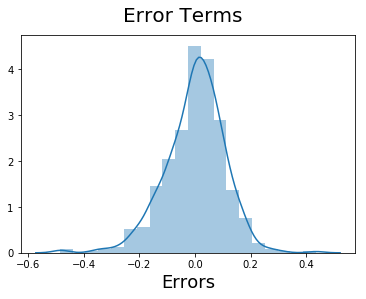

In [115]:
#Checking Assumption of Normality:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((residual), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                
plt.xlabel('Errors', fontsize = 18) 

In [116]:
#Checking columns
X_train_rfe11.columns

Index(['const', 'yr', 'windspeed', 'spring', 'winter', 'Light_Snow',
       'Mist_Cloud', 'Sunday', 'Jan', 'Sep'],
      dtype='object')

In [117]:
print(X_train_rfe11.shape)
print(residual.shape)

(510, 10)
(510,)


## Step 5: Model Evaluation & Predictions about the Test Set

In [118]:
# Create a list of numeric vars
num_vars=['atemp','hum','windspeed','cnt']
bike_test[num_vars] = scaler.fit_transform(bike_test[num_vars])

In [119]:
#Creating x and y sets

y_test = bike_test.pop('cnt')
X_test = bike_test

In [120]:
X_train_new=X_train_rfe11.drop(['const'], axis=1)

In [121]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test

X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [122]:
X_train_rfe11.columns

Index(['const', 'yr', 'windspeed', 'spring', 'winter', 'Light_Snow',
       'Mist_Cloud', 'Sunday', 'Jan', 'Sep'],
      dtype='object')

In [123]:
#Making predictions on the chosen model

y_pred = lm11.predict(X_test_new)

Text(0,0.5,'y_pred')

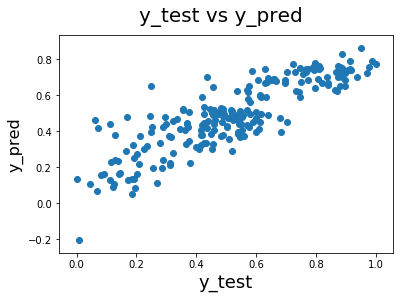

In [124]:
#CHECKING PREDICTED V/s TEST DATA 

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

#### Finally we have a model that seems good enough to predict demand of bikes. The actual and predicted cnt i.e demand significantly overlapped, thus indicating that the model is able to explain the change in demand very well

In [125]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [126]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

0.12685457147397983

In [127]:
#Calculate the r square for test

r_squared = r2_score(y_test, y_pred)
r_squared

0.7162808164291485

In [128]:
#R square of our model is around 77

In [129]:
X_t=X_train_new.iloc[:,0].values

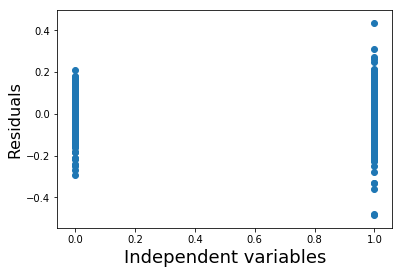

In [130]:
#PLotting the residuals to see if a pattern exists
#Checking assumption of homoscedasticity and autocorrelation
plt.figure()
plt.scatter(X_t,residual)
fig.suptitle('Independent vars vs residual', fontsize=20)              # Plot heading 
plt.xlabel('Independent variables', fontsize=18)                          # X-label
plt.ylabel('Residuals', fontsize=16)  
plt.show()

#### When we have time series data (e.g. yearly data), then the regression is likely to suffer from autocorrelation because demand next year will certainly be dependent on demand this year. Hence, error terms in different observations will surely be correlated with each other.

In [131]:
X_train_new.head()

,yr,windspeed,spring,winter,Light_Snow,Mist_Cloud,Sunday,Jan,Sep
653,1,0.300794,0,1,0,0,0,0,0
576,1,0.264686,0,0,0,0,0,0,0
426,1,0.255342,1,0,0,1,0,0,0
728,1,0.663106,1,0,0,0,1,0,0
482,1,0.188475,0,0,0,1,0,0,0


In [134]:
print(X_train_rfe11.columns)
print(lm11.summary())

Index(['const', 'yr', 'windspeed', 'spring', 'winter', 'Light_Snow',
       'Mist_Cloud', 'Sunday', 'Jan', 'Sep'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     187.7
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          4.31e-154
Time:                        16:20:32   Log-Likelihood:                 415.03
No. Observations:                 510   AIC:                            -810.1
Df Residuals:                     500   BIC:                            -767.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0

### We can see that the equation for best fitted line is :
### cnt = 0.248 X yr-0.20 X windspeed-0.23 X spring- 0.05 X winter-0.29 X Light_Snow-0.09X Mist_Cloud-0.04X Sunday-0.10X Jan-0.086 X Sep   

### We can see the demand for bikes depends mainly on below variables:
###  yr, windspeed, spring, winter, Light_Snow,Mist_Cloud, Sunday, Jan, Sep

### Final recommendations for the company
### Demand also higher in the month of Jan & Sep.